# Bank Customers Churn Prediction

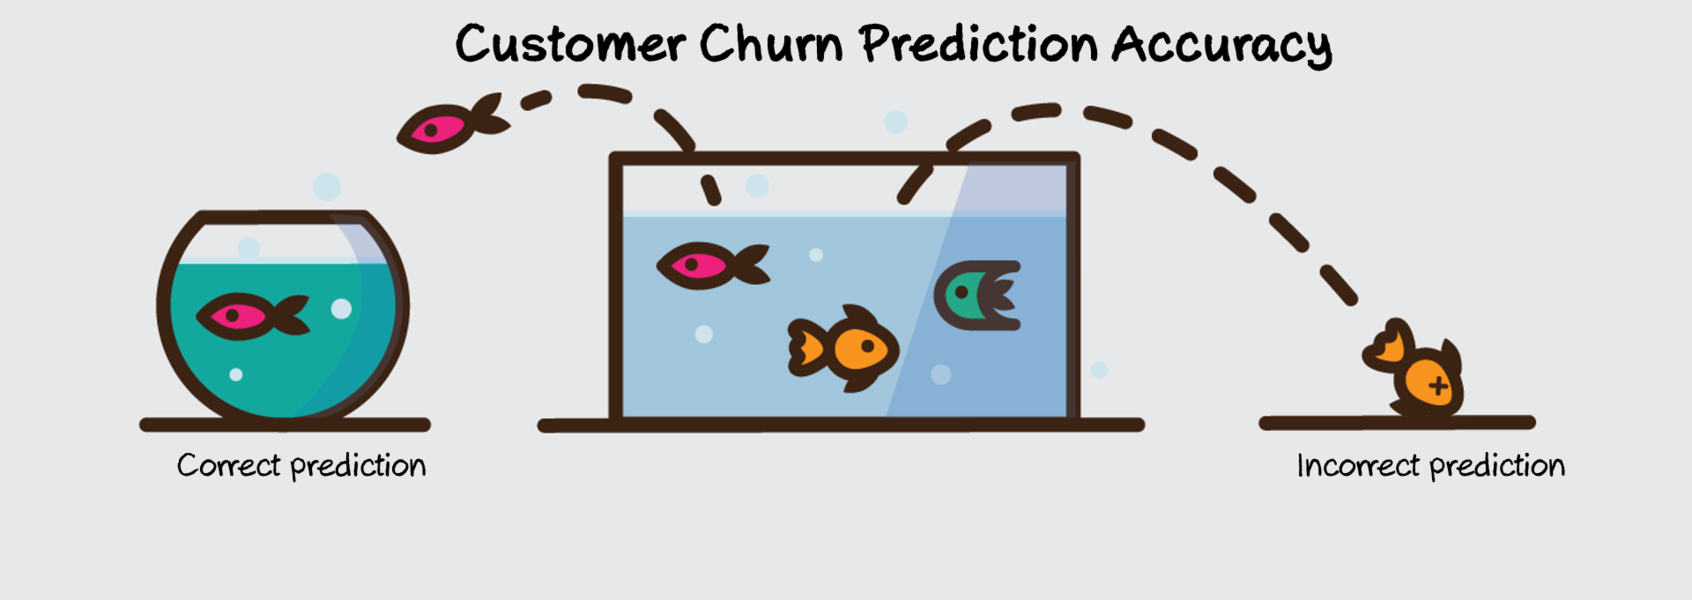

In [ ]:
from IPython.display import Image
Image('churn.png')

## 1. Data preprocessing and exploration

### 1.1. Importing libraries and dataset

In [ ]:
import pandas as pd # manipulation des DataFrame (tableau de données)
import numpy as np # calcul scientifique
import matplotlib.pyplot as plt # visualisation (module pyplot : 2D)
import seaborn as sns # manipulation et visualisation des stats

In [ ]:
pd.__version__

'1.3.1'

In [ ]:
import warnings # ignorer les alertes
warnings.filterwarnings('ignore')

In [ ]:
# importer dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.head() # afficher les 5 premières lignes

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.tail() # afficher les 5 dernières lignes

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# dimension 
dataset.shape

(10000, 14)

In [ ]:
print('le nombre de lignes est {}'.format(dataset.shape[0]))
print('le nombre de colonnes est {}'.format(dataset.shape[1]))

le nombre de lignes est 10000
le nombre de colonnes est 14


In [ ]:
col_names = dataset.columns
print(col_names)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
# valeurs manquantes
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# informations
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Supprimer les colonnes 'RowNumber', 'CustomerId' et 'Surname'
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'],axis = 1)

In [ ]:
dataset.shape

(10000, 11)

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 1.2. Description statistique

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
dataset.describe() # description des variables numériques

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [ ]:
dataset['Age'].mean()

38.9218

In [ ]:
dataset['Age'].quantile(0.25)

32.0

In [ ]:
dataset['Age'].quantile(0.95)

60.0

### 1.3. Boxplot 

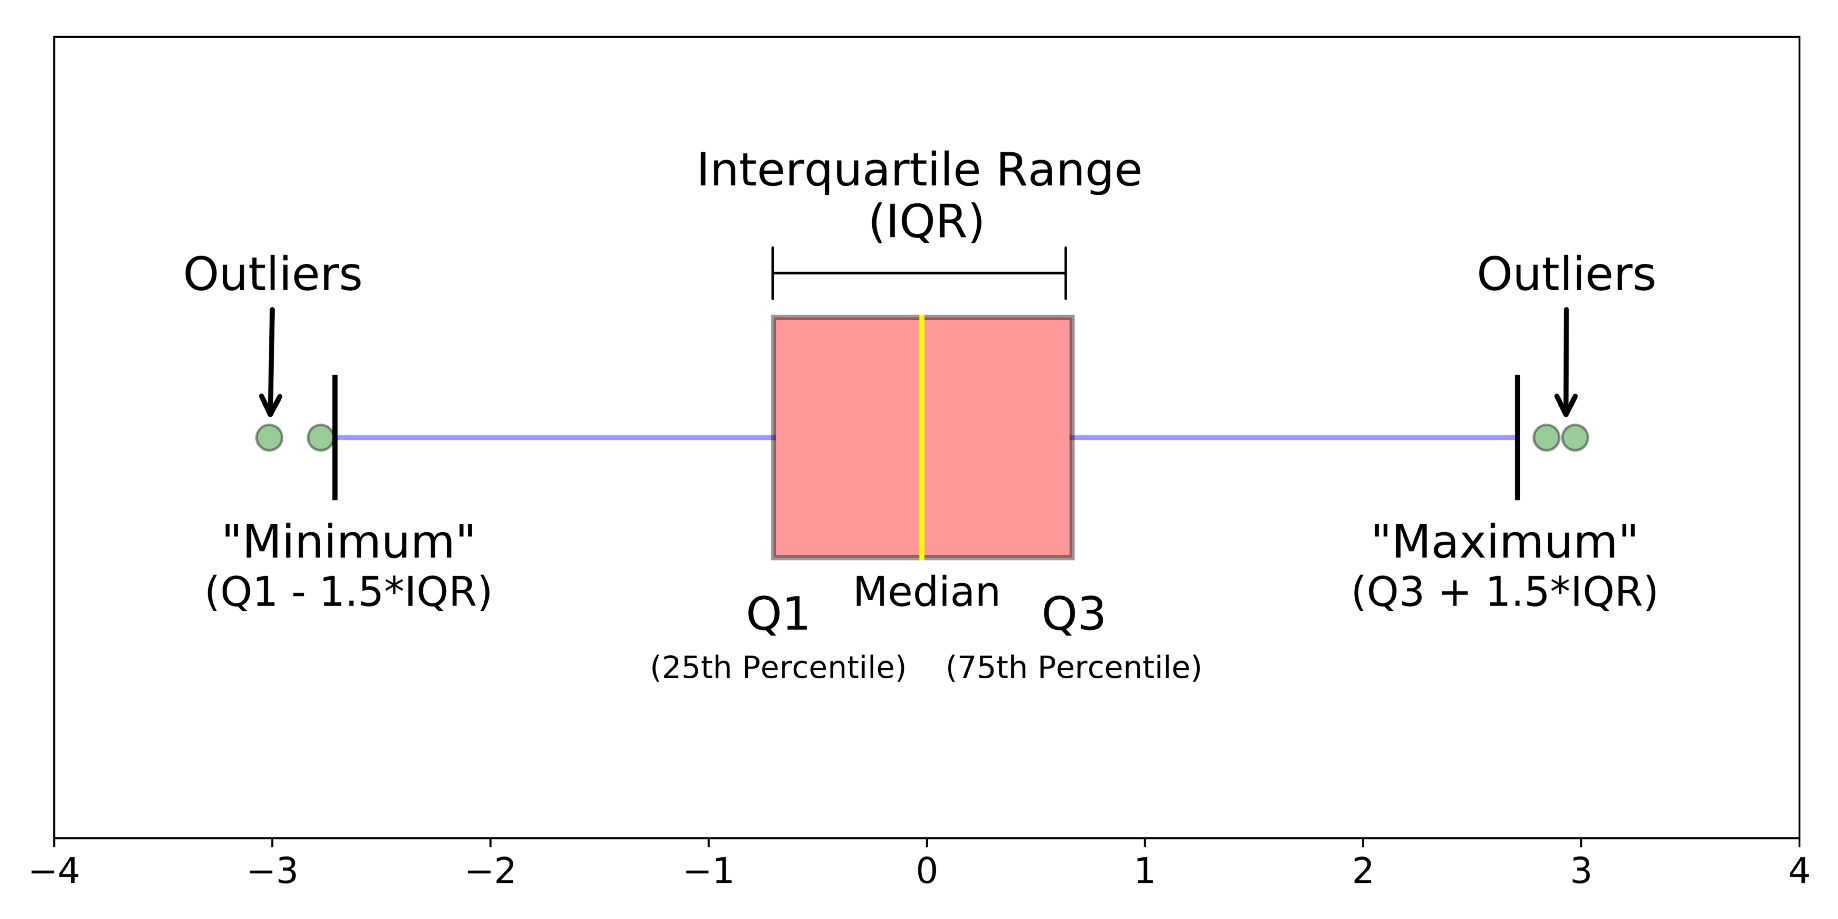

In [ ]:
Image('boxplot.png')

In [ ]:
my_list_1 = ['Balance','EstimatedSalary']

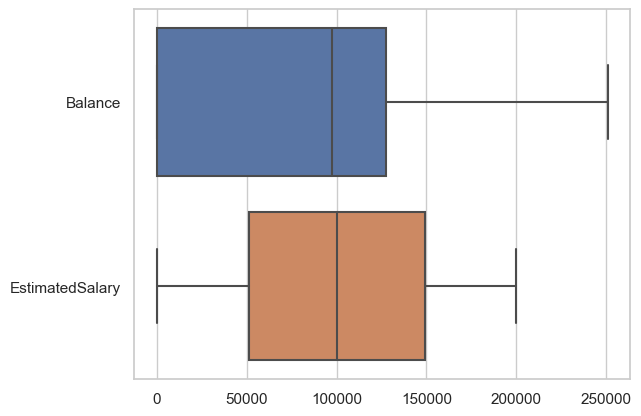

In [ ]:
sns.set(style = 'whitegrid')
sns.boxplot(data = dataset[my_list_1], orient ='h')
plt.show()

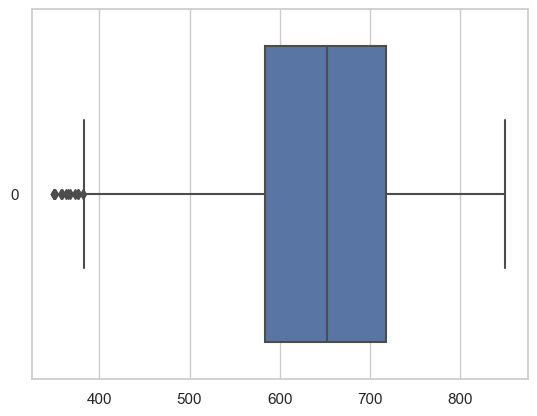

In [ ]:
sns.boxplot(data = dataset.CreditScore, orient ='h')
plt.show()

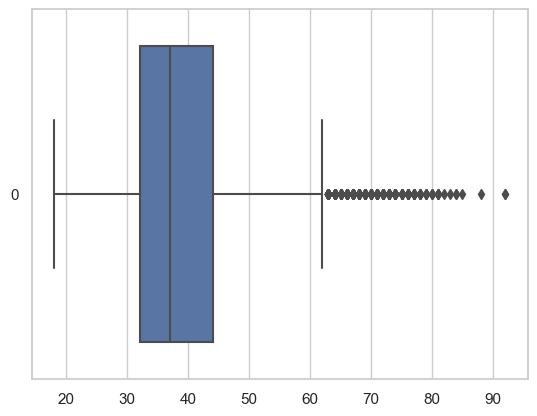

In [ ]:
sns.boxplot(data = dataset.Age, orient ='h')
plt.show()

In [ ]:
IQR = dataset.Age.quantile(0.75)-dataset.Age.quantile(0.25)
IQR

12.0

In [ ]:
Sup = dataset.Age.quantile(0.75) + 1.5 * IQR
Sup

62.0

In [ ]:
dataset[dataset.Age > Sup]['CreditScore'].count()

359

### 1.4. Scatterplot numerical features 

In [ ]:
my_list_2 = ['CreditScore','Balance','EstimatedSalary','Exited']

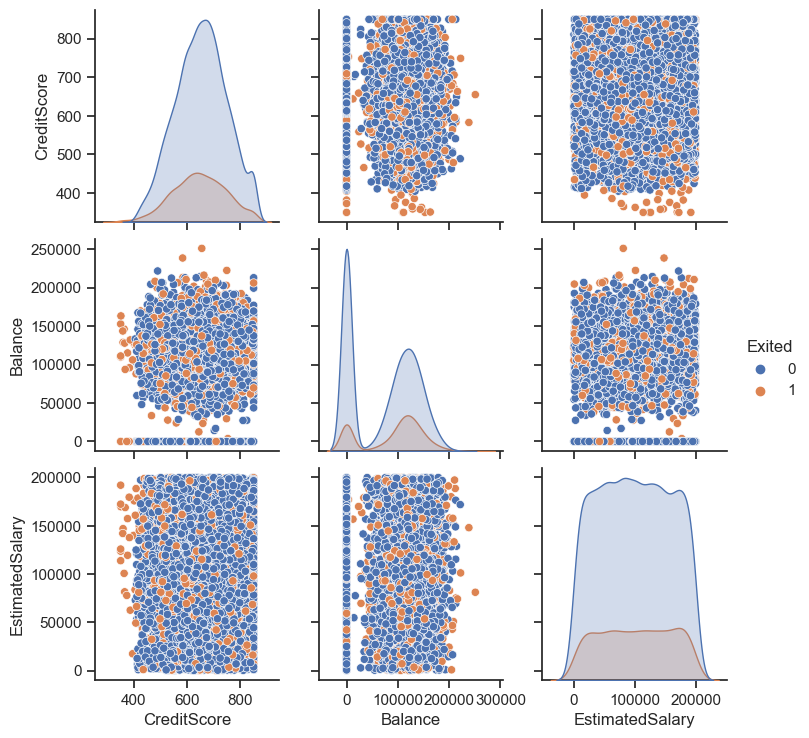

In [ ]:
sns.set(style ='ticks')
sns.pairplot(data = dataset[my_list_2], hue = 'Exited')
plt.show()

In [ ]:
dataset[dataset.CreditScore <= 400]['Exited'].mean()

1.0

### 1.5. Features and target variable

In [ ]:
X = dataset.iloc[:,0:10]
y = dataset.iloc[:,10]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
# Convertir DataFrame en array
X = X.values
y = y.values

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X[0:10,:] # 10 premières lignes

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [ ]:
X.shape

(10000, 10)

In [ ]:
y.shape

(10000,)

In [ ]:
X.ndim

2

In [ ]:
y.ndim

1

### 1.6. Encoding categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
X[:,1] = label.fit_transform(X[:,1])

In [ ]:
X[0:10,:]

array([[619, 0, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [ ]:
X[:,2] = label.fit_transform(X[:,2])

In [ ]:
X[0:10,:]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]], dtype=object)

**Dummy encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer([('Geography',OneHotEncoder(),[1])],\
                      remainder = 'passthrough')
X = ct.fit_transform(X)

In [ ]:
X.shape

(10000, 12)

In [ ]:
X[0:10,:]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [ ]:
X = X[:,1:]

In [ ]:
X[0:10,:]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [ ]:
final_col_names =['Geography2','Geography3','CreditScore',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
        'HasCrCard','IsActiveMember', 'EstimatedSalary']

In [ ]:
final_col_names

['Geography2',
 'Geography3',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

### 1.7. Splitting the dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,\
                                                   random_state = 0)

In [ ]:
X_test[0:5,:]

array([[1.0, 0.0, 597, 0, 35, 8, 131101.04, 1, 1, 1, 192852.67],
       [0.0, 0.0, 523, 0, 40, 2, 102967.41, 1, 1, 0, 128702.1],
       [0.0, 1.0, 706, 0, 42, 8, 95386.82, 1, 1, 1, 75732.25],
       [0.0, 0.0, 788, 1, 32, 4, 112079.58, 1, 0, 0, 89368.59],
       [1.0, 0.0, 706, 1, 38, 5, 163034.82, 2, 1, 1, 135662.17]],
      dtype=object)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(8000,)
(2000,)


In [ ]:
y.mean()

0.2037

In [ ]:
y_train.mean()

0.204

In [ ]:
y_test.mean()

0.2025

### 1.8. Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
X_train[0,:]

array([0.0, 1.0, 667, 0, 34, 5, 0.0, 2, 1, 0, 163830.64], dtype=object)

In [ ]:
X_train_sc[0,:]

array([-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,
        0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
        1.10643166])

In [ ]:
(X_train[0,2]-X_train[:,2].mean())/(X_train[:,2].std())

0.16958176236487257

In [ ]:
scaler.inverse_transform(X_train_sc[0,:])

array([0.0000000e+00, 1.0000000e+00, 6.6700000e+02, 0.0000000e+00,
       3.4000000e+01, 5.0000000e+00, 0.0000000e+00, 2.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 1.6383064e+05])

Pour la Normalisation, on utilise

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## 2. k Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test_sc)

In [ ]:
X_test[0:10,:]

array([[1.0, 0.0, 597, 0, 35, 8, 131101.04, 1, 1, 1, 192852.67],
       [0.0, 0.0, 523, 0, 40, 2, 102967.41, 1, 1, 0, 128702.1],
       [0.0, 1.0, 706, 0, 42, 8, 95386.82, 1, 1, 1, 75732.25],
       [0.0, 0.0, 788, 1, 32, 4, 112079.58, 1, 0, 0, 89368.59],
       [1.0, 0.0, 706, 1, 38, 5, 163034.82, 2, 1, 1, 135662.17],
       [0.0, 1.0, 670, 0, 57, 3, 175575.95, 2, 1, 0, 99061.75],
       [0.0, 1.0, 590, 1, 34, 0, 65812.35, 2, 0, 1, 160346.3],
       [0.0, 1.0, 636, 0, 29, 6, 157576.47, 2, 1, 1, 101102.39],
       [0.0, 0.0, 598, 0, 64, 9, 0.0, 1, 0, 1, 13181.37],
       [0.0, 0.0, 456, 0, 63, 1, 165350.61, 2, 0, 0, 140758.07]],
      dtype=object)

In [ ]:
for i in range(10):
    print(y_test[i],y_pred_knn[i])

0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
print(confusion_matrix(y_test,y_pred_knn))

[[1486  109]
 [ 237  168]]


In [ ]:
print('Accuracy score {0:.3f}'.format(accuracy_score(y_test,y_pred_knn)))
print('Precision score {0:.3f}'.format(precision_score(y_test,y_pred_knn)))
print('Recall score {0:.3f}'.format(recall_score(y_test,y_pred_knn)))

Accuracy score 0.827
Precision score 0.606
Recall score 0.415


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1595
           1       0.61      0.41      0.49       405

    accuracy                           0.83      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.81      0.83      0.81      2000



**Grid search**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13,15]}
model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters, scoring = 'accuracy', cv = 5)
grille = clf.fit(X_train_sc, y_train)

In [ ]:
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 9}
0.8303750000000001


In [ ]:
y_pred_knn_o = grille.predict(X_test_sc)

In [ ]:
print('Accuracy score op {0:.3f}'.format(accuracy_score(y_test,y_pred_knn_o)))
print('Precision score op {0:.3f}'.format(precision_score(y_test,y_pred_knn_o)))
print('Recall score op {0:.3f}'.format(recall_score(y_test,y_pred_knn_o)))

Accuracy score op 0.835
Precision score op 0.659
Recall score op 0.378


In [ ]:
print(classification_report(y_test,y_pred_knn_o))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1595
           1       0.66      0.38      0.48       405

    accuracy                           0.83      2000
   macro avg       0.76      0.66      0.69      2000
weighted avg       0.82      0.83      0.82      2000



## 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
for i in range(10):
    print(y_test[i],y_pred_dt[i])

0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1


In [ ]:
print('Confusion matrix :\n')
print(confusion_matrix(y_test,y_pred_dt))
print('Accuracy score {0:.3f}'.format(accuracy_score(y_test,y_pred_dt)))
print('Precision score {0:.3f}'.format(precision_score(y_test,y_pred_dt)))
print('Recall score {0:.3f}'.format(recall_score(y_test,y_pred_dt)))

Confusion matrix :

[[1377  218]
 [ 169  236]]
Accuracy score 0.806
Precision score 0.520
Recall score 0.583


In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1595
           1       0.52      0.58      0.55       405

    accuracy                           0.81      2000
   macro avg       0.71      0.72      0.71      2000
weighted avg       0.82      0.81      0.81      2000



**Decision Tree Visualization**

In [ ]:
# !pip install graphviz

In [ ]:
final_col_names

['Geography2',
 'Geography3',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [ ]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

In [ ]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X,y)

DecisionTreeClassifier(max_depth=7)

In [ ]:
tree.export_graphviz(model,feature_names = final_col_names,
                    out_file = 'cdoss_ml.dot',
                    label = 'all',
                    filled = True,
                    rounded = True)

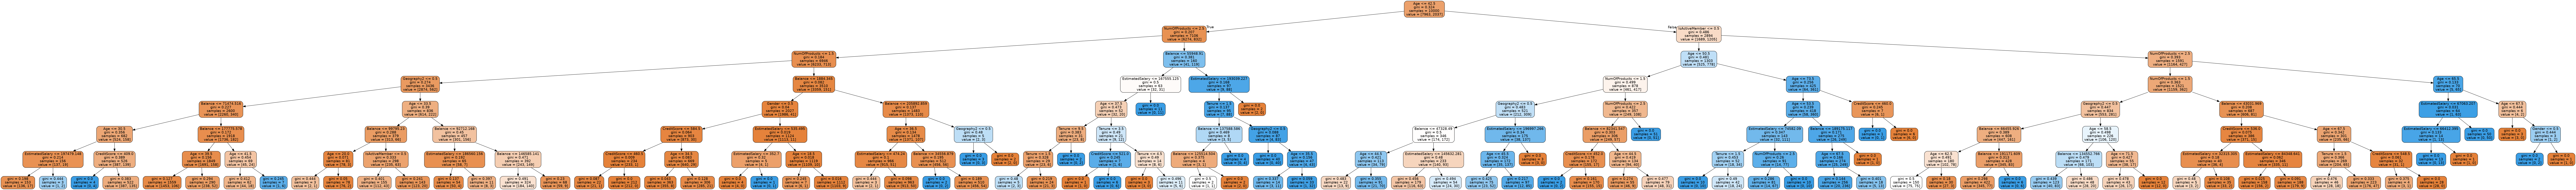

In [ ]:
Image('cdoss_ml.png')

## 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print('Confusion matrix :\n')
print(confusion_matrix(y_test,y_pred_rf))
print('Accuracy score {0:.3f}'.format(accuracy_score(y_test,y_pred_rf)))
print('Precision score {0:.3f}'.format(precision_score(y_test,y_pred_rf)))
print('Recall score {0:.3f}'.format(recall_score(y_test,y_pred_rf)))

Confusion matrix :

[[1520   75]
 [ 194  211]]
Accuracy score 0.866
Precision score 0.738
Recall score 0.521


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000



## 5. Features selection

In [ ]:
final_col_names

['Geography2',
 'Geography3',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [ ]:
importances = rf.feature_importances_

In [ ]:
importances

array([0.02757855, 0.01424826, 0.14319561, 0.01889768, 0.23572232,
       0.08097461, 0.14542024, 0.12968973, 0.01875326, 0.03873248,
       0.14678727])

In [ ]:
importances.sum()

1.0000000000000002

In [ ]:
sorted_idx = np.argsort(importances)
features_arr = np.asarray(final_col_names)

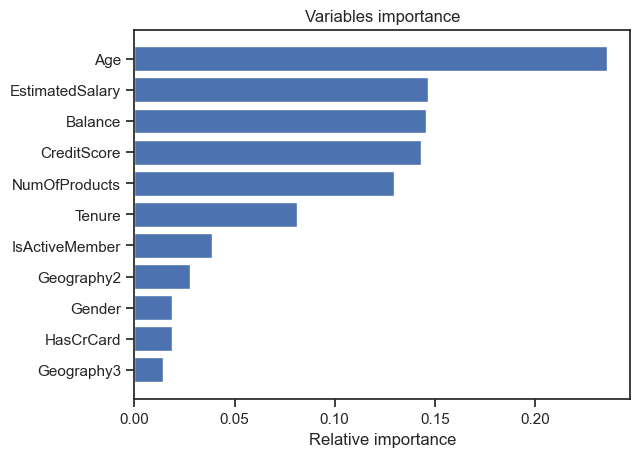

In [ ]:
padding = np.arange(X_train.size/len(X_train))
plt.barh(padding,importances[sorted_idx],align = 'center')
plt.yticks(padding, features_arr[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variables importance')
plt.show()

## 6. Support vector machine

In [ ]:
from sklearn.svm import SVC
linear = SVC(kernel='linear')
linear.fit(X_train_sc, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_l = linear.predict(X_test_sc)

In [ ]:
print('Confusion matrix :\n')
print(confusion_matrix(y_test,y_pred_l))
print('Accuracy score {0:.3f}'.format(accuracy_score(y_test,y_pred_l)))
print('Precision score {0:.3f}'.format(precision_score(y_test,y_pred_l)))
print('Recall score {0:.3f}'.format(recall_score(y_test,y_pred_l)))

Confusion matrix :

[[1595    0]
 [ 405    0]]
Accuracy score 0.797
Precision score 0.000
Recall score 0.000


In [ ]:
print(classification_report(y_test,y_pred_l))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



In [ ]:
from sklearn.svm import SVC
kernel = SVC(kernel='rbf')
kernel.fit(X_train_sc, y_train)

SVC()

In [ ]:
y_pred_k = kernel.predict(X_test_sc)

In [ ]:
print('Confusion matrix :\n')
print(confusion_matrix(y_test,y_pred_k))
print('Accuracy score {0:.3f}'.format(accuracy_score(y_test,y_pred_k)))
print('Precision score {0:.3f}'.format(precision_score(y_test,y_pred_k)))
print('Recall score {0:.3f}'.format(recall_score(y_test,y_pred_k)))

Confusion matrix :

[[1547   48]
 [ 225  180]]
Accuracy score 0.864
Precision score 0.789
Recall score 0.444


In [ ]:
print(classification_report(y_test,y_pred_k))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.79      0.44      0.57       405

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



## 7. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(X_test_sc)

In [ ]:
print('Confusion matrix :\n')
print(confusion_matrix(y_test,y_pred_lr))
print('Accuracy score {0:.3f}'.format(accuracy_score(y_test,y_pred_lr)))
print('Precision score {0:.3f}'.format(precision_score(y_test,y_pred_lr)))
print('Recall score {0:.3f}'.format(recall_score(y_test,y_pred_lr)))

Confusion matrix :

[[1526   69]
 [ 309   96]]
Accuracy score 0.811
Precision score 0.582
Recall score 0.237


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



## 8. Receiver Operating Characeristic (ROC curve)

https://fr.wikipedia.org/wiki/Courbe_ROC

In [ ]:
from sklearn import metrics

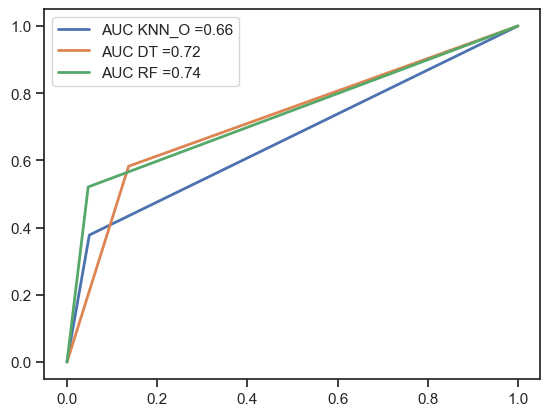

In [ ]:
fpr, tpr, thr = metrics.roc_curve(y_test,y_pred_knn_o)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,y_pred_dt)
fpr3, tpr3, thr3 = metrics.roc_curve(y_test,y_pred_rf)
auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
plt.plot(fpr,tpr,'-',lw=2,label='AUC KNN_O =%.2f' %auc)
plt.plot(fpr2,tpr2,'-',lw=2,label='AUC DT =%.2f' %auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='AUC RF =%.2f' %auc3)
plt.legend()
plt.show()